In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [39]:
main = pd.read_csv('Family Income and Expenditure.csv')
income_annually = main.iloc[:, :2]
income_monthly=pd.DataFrame({
    'Monthly Income':(income_annually['Total Household Income']/12).astype(int),
    "Region":income_annually["Region"]
})

In [40]:
average_income = income_monthly.groupby("Region", as_index=False)["Monthly Income"].mean()
average_income["Monthly Income"] = average_income["Monthly Income"].astype(int)
average_income = average_income.sort_values(by='Monthly Income', ascending=False)


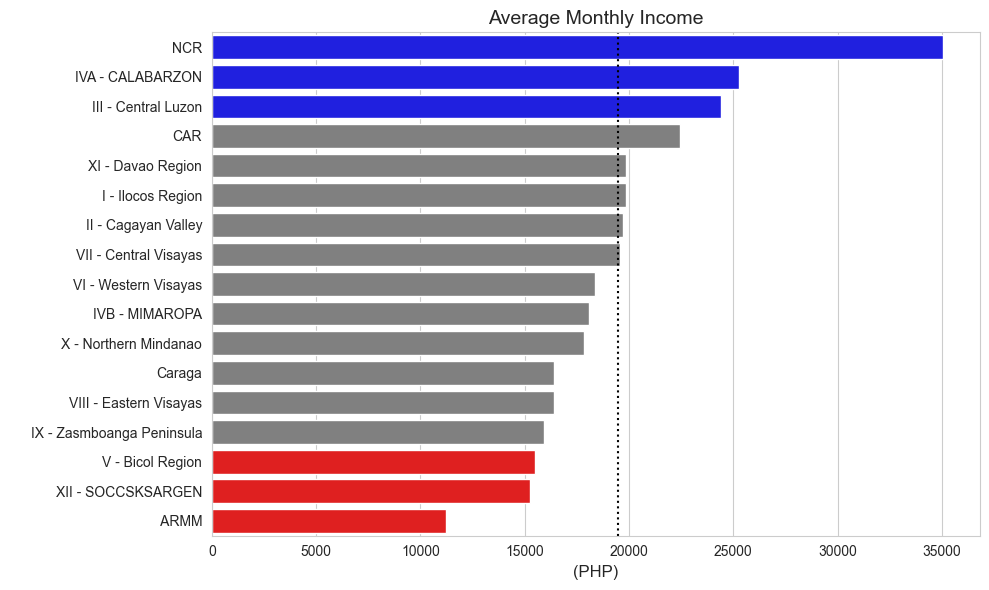

In [41]:
# Calculate overall average
overall_avg = average_income['Monthly Income'].mean()

# Assign color labels
color_labels = ['blue'] * 3 + ['gray'] * (len(average_income) - 6) + ['red'] * 3
average_income['Color'] = color_labels

# Plot
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.barplot(
    data=average_income,
    x='Monthly Income',
    y='Region',
    hue='Color',
    palette={'blue': 'blue', 'gray': 'gray', 'red': 'red'},
    dodge=False,
    legend=False
)

# Add dotted line for overall average
plt.axvline(overall_avg, color='black', linestyle='dotted', linewidth=1.5)

# Titles and labels
plt.title('Average Monthly Income', fontsize=14)
plt.xlabel('(PHP)', fontsize=12)
plt.ylabel(' ', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


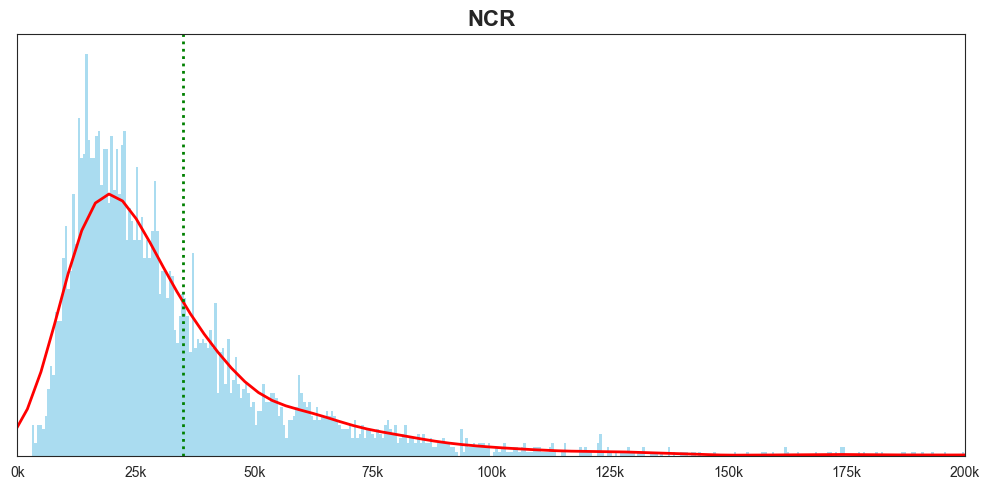

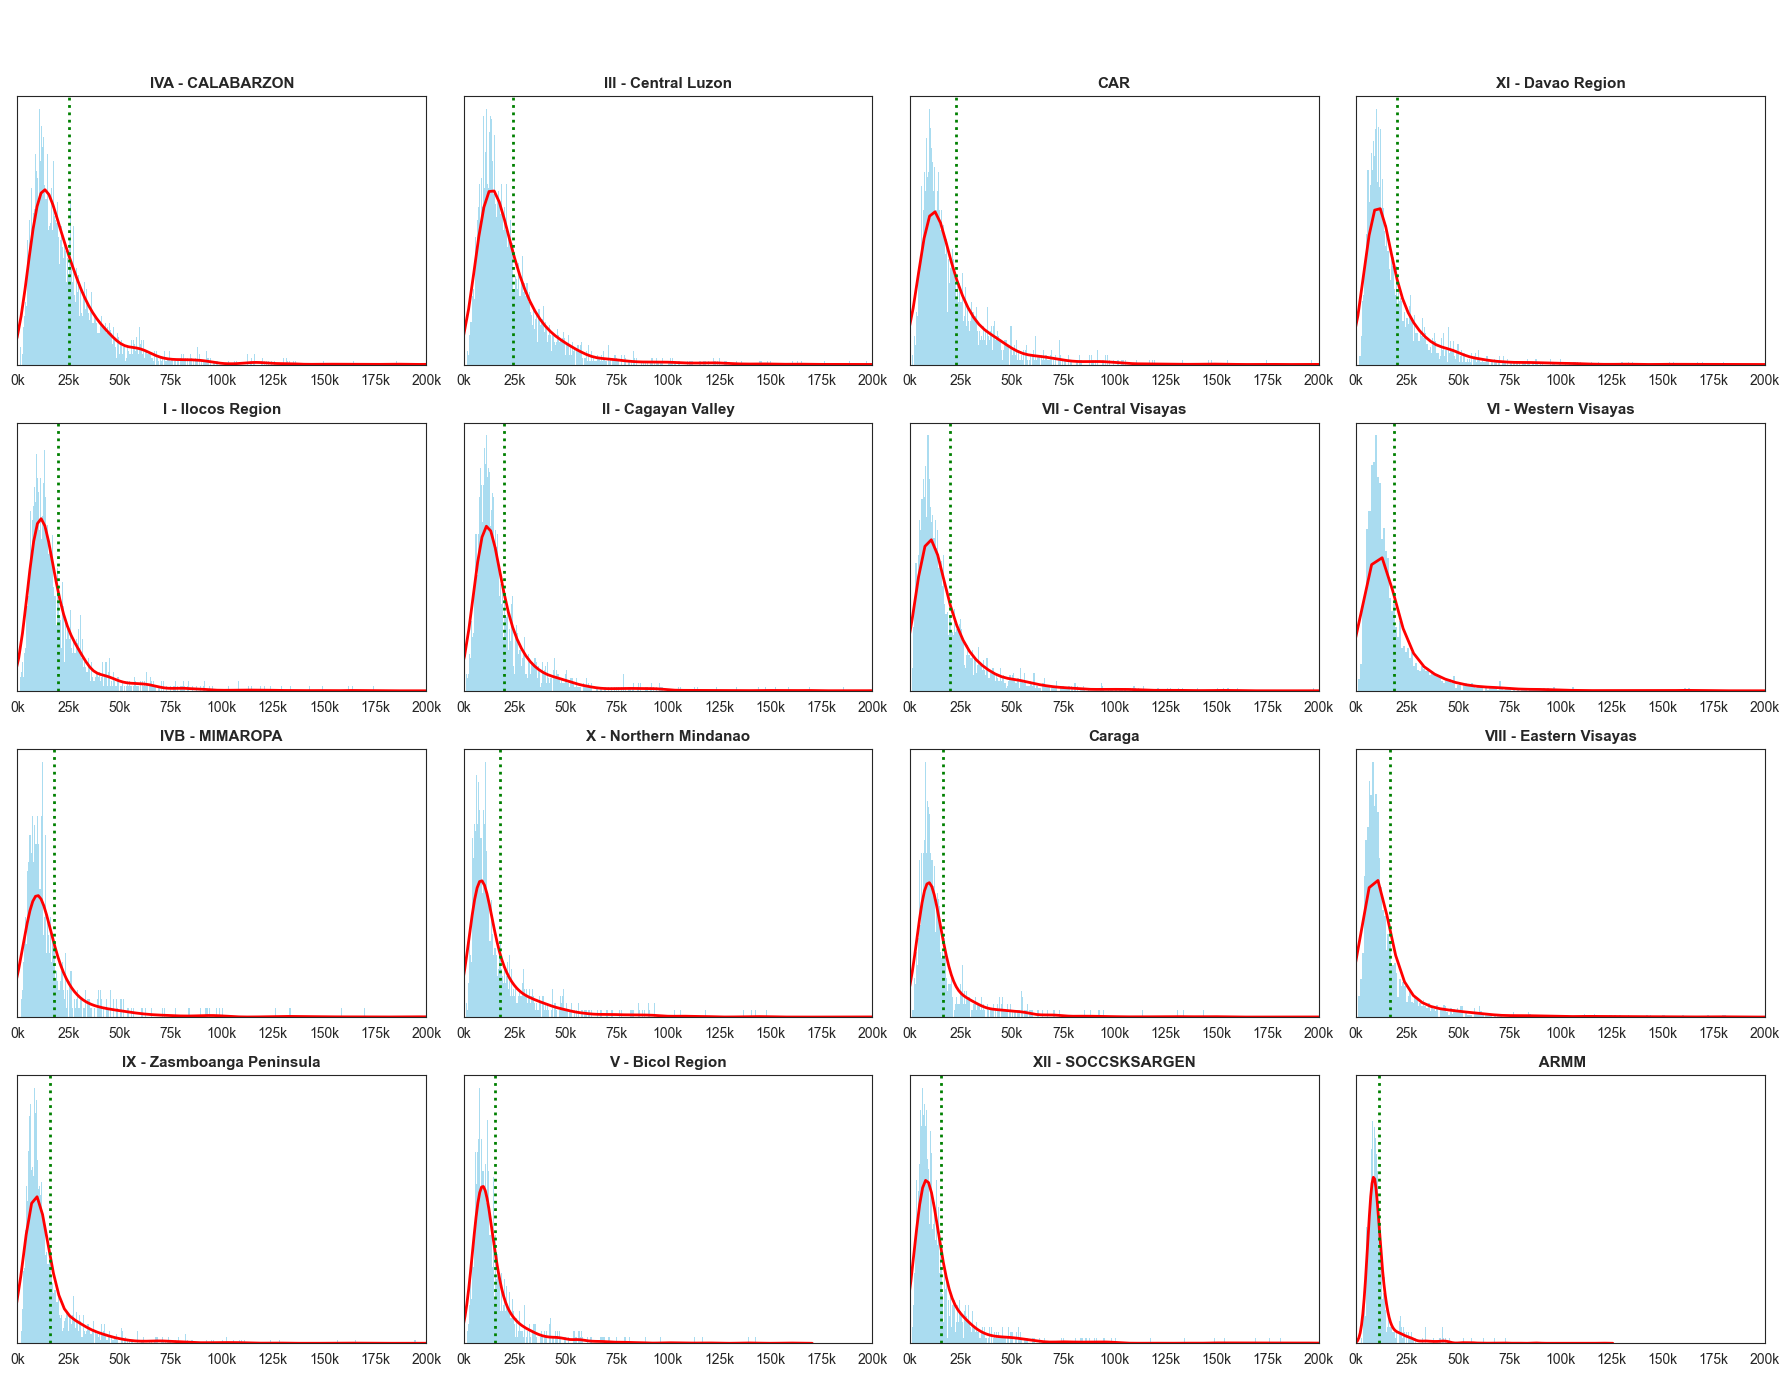

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import pandas as pd

sns.set_style("white")

# Data
regions = income_monthly["Region"].unique()
xlim = (0, 200000)

# X-axis formatter
k_formatter = mticker.FuncFormatter(lambda x, _: f'{int(x/1000)}k')


def plot_region(region, ax=None):
    data = income_monthly[income_monthly["Region"] == region]
    sns.histplot(data["Monthly Income"], bins=1000, color="skyblue", edgecolor="none", alpha=0.7, stat='density', ax=ax)
    sns.kdeplot(data["Monthly Income"], color='red', linewidth=2, ax=ax, legend=False)
    mean_income = data["Monthly Income"].mean()
    if ax:
        ax.axvline(mean_income, color="green", linestyle="dotted", linewidth=2)
        ax.set_title(region, fontsize=11, weight="bold")
        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.set_yticks([])
        ax.xaxis.set_major_formatter(k_formatter)
        ax.set_xlim(xlim)
        ax.legend([],[], frameon=False)
    else:
        plt.axvline(mean_income, color="green", linestyle="dotted", linewidth=2)
        plt.title(region, fontsize=16, weight="bold")
        plt.xlabel("")
        plt.ylabel("")
        plt.yticks([])
        plt.gca().xaxis.set_major_formatter(k_formatter)
        plt.xlim(xlim)
        plt.legend([],[], frameon=False)


# NCR plot
plt.figure(figsize=(10, 5))
plot_region("NCR")
plt.tight_layout()
plt.show()

# Other regions plot
other_regions = [r for r in regions if r != "NCR"]

# Calculate mean income for each region
region_means = {}
for region in other_regions:
    region_data = income_monthly[income_monthly["Region"] == region]
    region_means[region] = region_data["Monthly Income"].mean()

# Sort regions by mean income in descending order
sorted_regions = sorted(region_means.items(), key=lambda item: item[1], reverse=True)
sorted_regions = [region[0] for region in sorted_regions]  # Extract just the region names

fig, axes = plt.subplots(4, 4, figsize=(18, 14))
axes = axes.flatten()

for i, region in enumerate(sorted_regions):
    plot_region(region, ax=axes[i])

# Hide unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle(" ", fontsize=18, weight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()